In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Выборка центров случайным образом

In [2]:
def Random_center(X, count):
    size = X.shape[0]
    a = np.random.randint(0, size, size = count)
    return np.array(X[a])

# Выборка центров специальным методом

In [3]:
from numpy.linalg import norm
def Improve_center(X, count):
    center = np.zeros(count, dtype=int)
    size = X.shape[0]
    center1 = 0
    center2 = 1
    max = norm(X[1] - X[0])
    for i in range(size):     
        for j in range(i, size):
            if norm(X[i] - X[j]) > max:
                max = norm(X[i] - X[j])
                center1 = i
                center2 = j
    center[0] = center1
    center[1] = center2
    count_center = 2
    min_center = 0
    while count - count_center:
        max_min = 0
        for i in range(size):   
            if i in center[:count_center]:
                continue
            min = norm(X[i] - X[center[0]])
            min_center = i
            for j in range(1, count_center):
                if norm(X[i] - X[center[j]]) < min:
                    min = norm(X[i] - X[center[j]])
                    min_center = i
            if max_min < min:
                max_min = min
                max_min_centre = min_center
        center[count_center] = max_min_centre
        count_center += 1
    return np.array(X[center])       

# k-means

In [4]:
from numpy.linalg import norm
e = 1e-4
def k_means(X, centers):
    size = X.shape[0]
    count = centers.shape[0]
    while True:
        y_new = np.zeros(size, dtype=int)
        claster_size = np.zeros(count)
        for i in range(size):
            min = norm(X[i] - centers[0])
            pos_min = 0
            for j in range(1, count):
                if (norm(X[i] - centers[j]) < min):
                    min = norm(X[i] - centers[j])
                    pos_min = j
            y_new[i] = pos_min
            claster_size[pos_min] += 1
        new_centers = np.zeros((count, 2))
        for i in range(size):
            new_centers[y_new[i]] += X[i]
        new_centers /= claster_size.reshape((count, 1))
        dist_centers = np.zeros(count)
        flag = np.zeros(count, dtype=int)
        posx_min = np.zeros(count, dtype=int)
        for i in range(size):
            if not flag[y_new[i]]:
                flag[y_new[i]] = 1
                dist_centers[y_new[i]] = norm(new_centers[y_new[i]] - X[i])
                posx_min[y_new[i]] = i
            if norm(new_centers[y_new[i]] - X[i]) < dist_centers[y_new[i]]:
                dist_centers[y_new[i]] = norm(new_centers[y_new[i]] - X[i])
                posx_min[y_new[i]] = i
        new_centers = np.array(X[posx_min])
        if norm(new_centers - centers) < e:
               return (y_new, new_centers)
        centers = np.array(new_centers)

In [5]:
def show_plot(X, y_old, y_new, centers_old, centers_new):
    fig = plt.figure(figsize=(30, 10))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    colors = np.array(['purple', 'blue', 'green', 'yellow', 'pink', 'orange', 'grey'])
    ax1.scatter(X[:, 0], X[:, 1], c = colors[y_old], s = 50)
    ax1.scatter(centers_old[:, 0], centers_old[:, 1], c = "r", s = 300, marker = 'd')
    ax1.set_title('Before k-means')
    ax2.scatter(X[:, 0], X[:, 1], c = colors[y_new], s = 50)
    ax2.scatter(centers_new[:, 0], centers_new[:, 1], c = "r", s = 300, marker = 'd')
    ax2.set_title('After k-means')

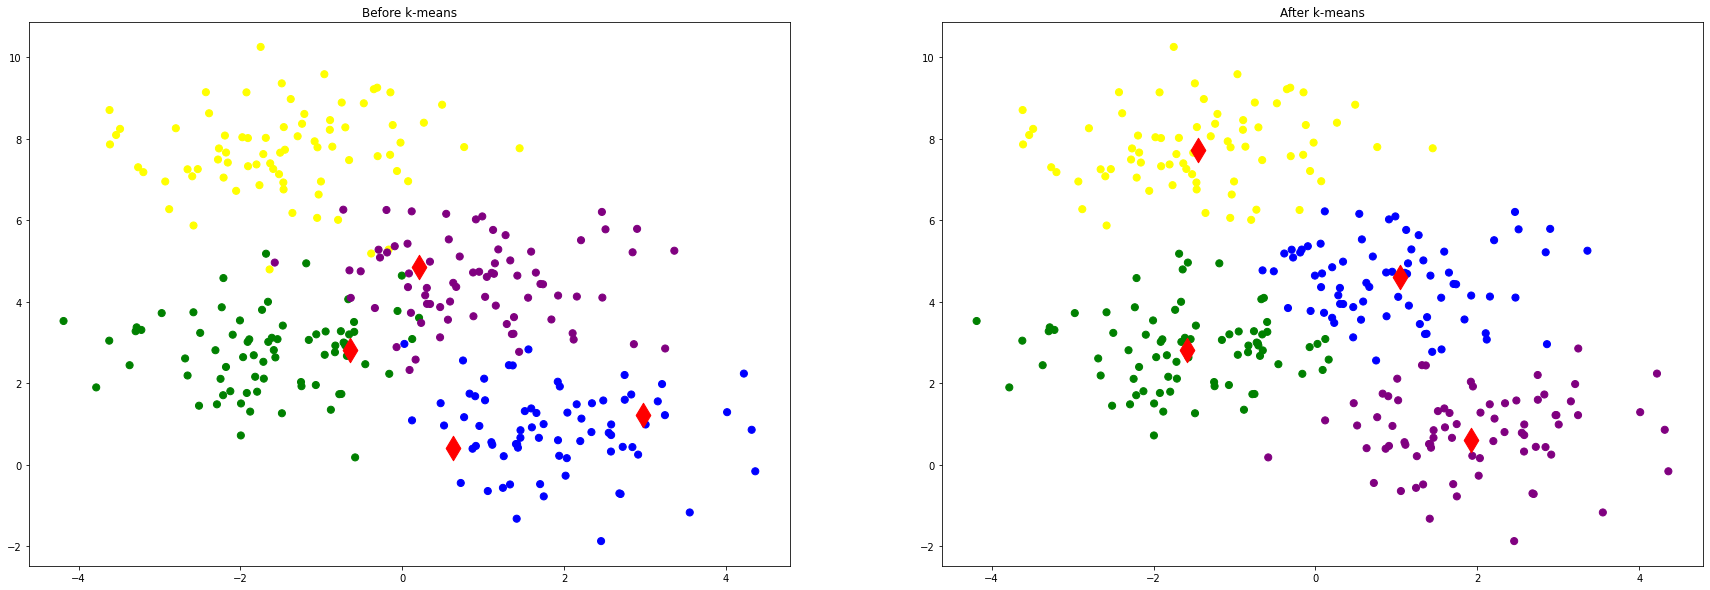

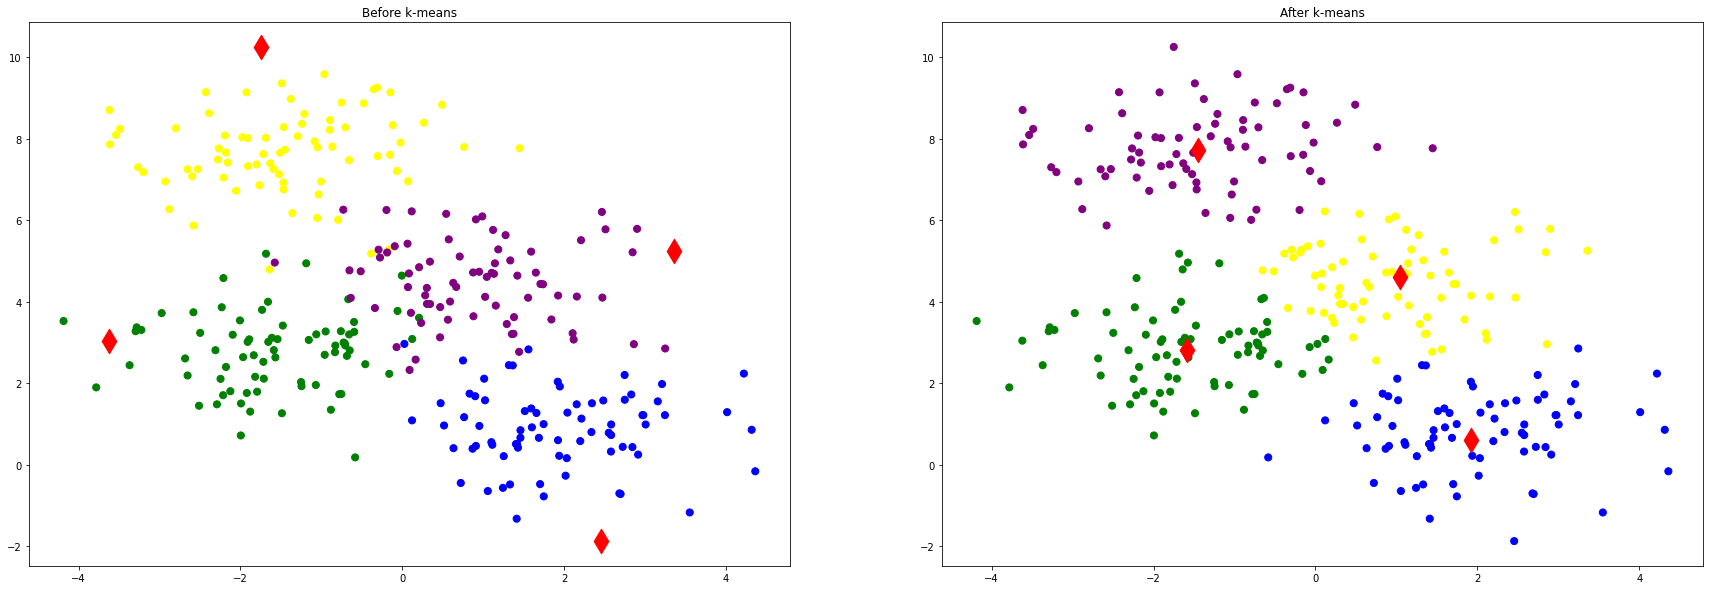

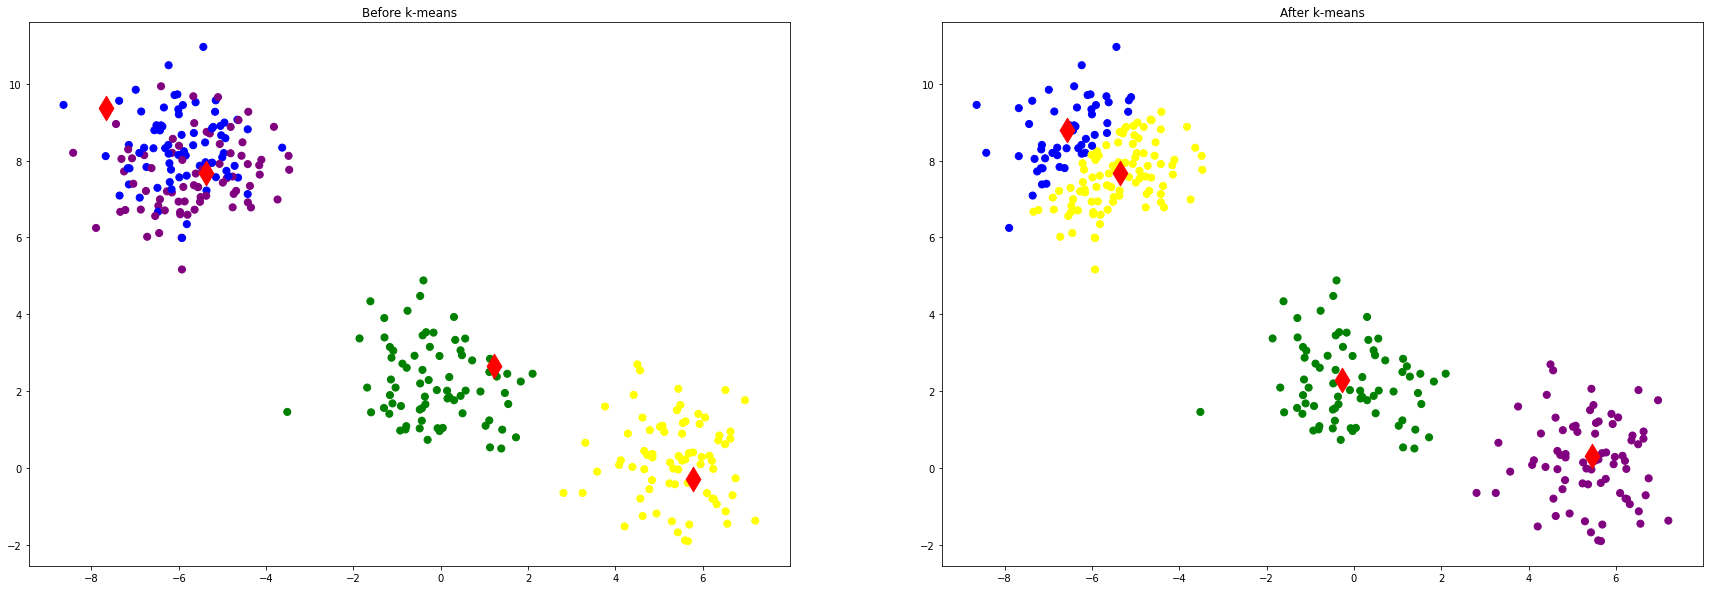

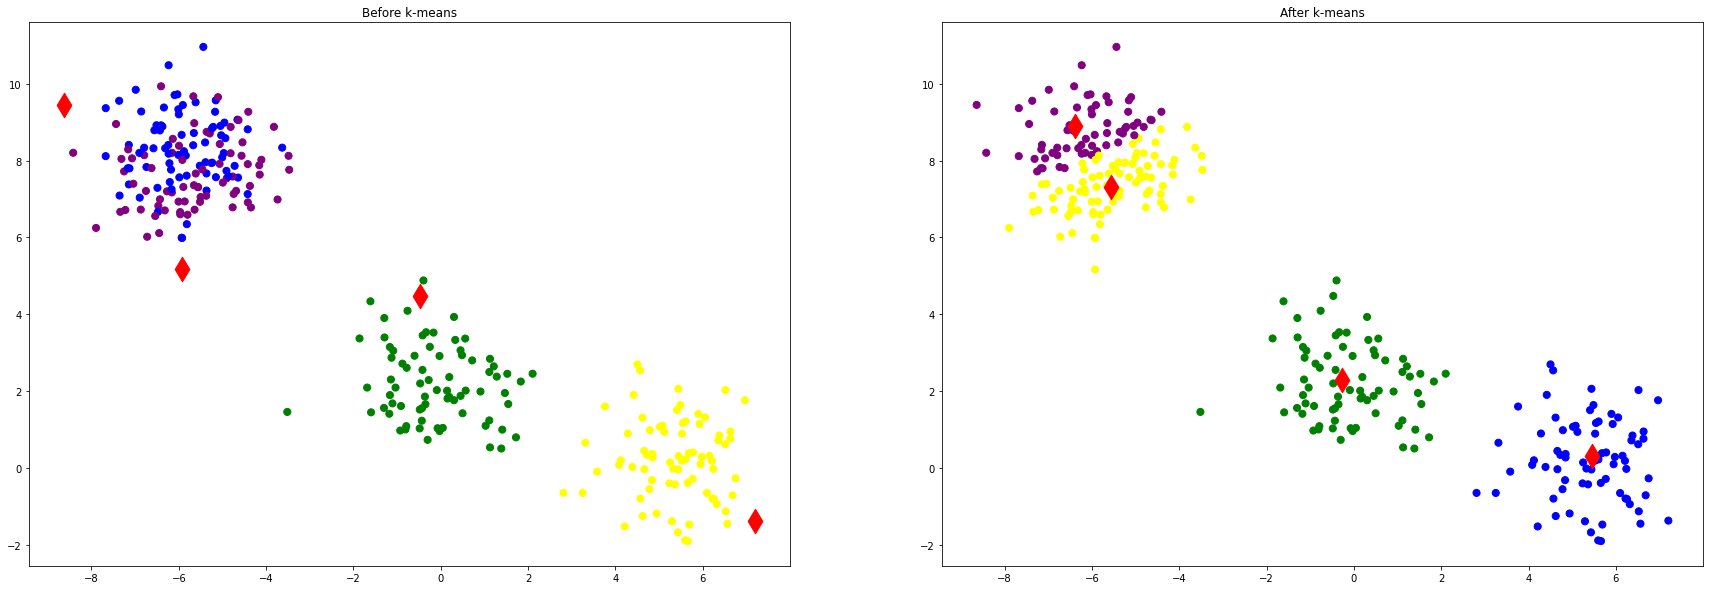

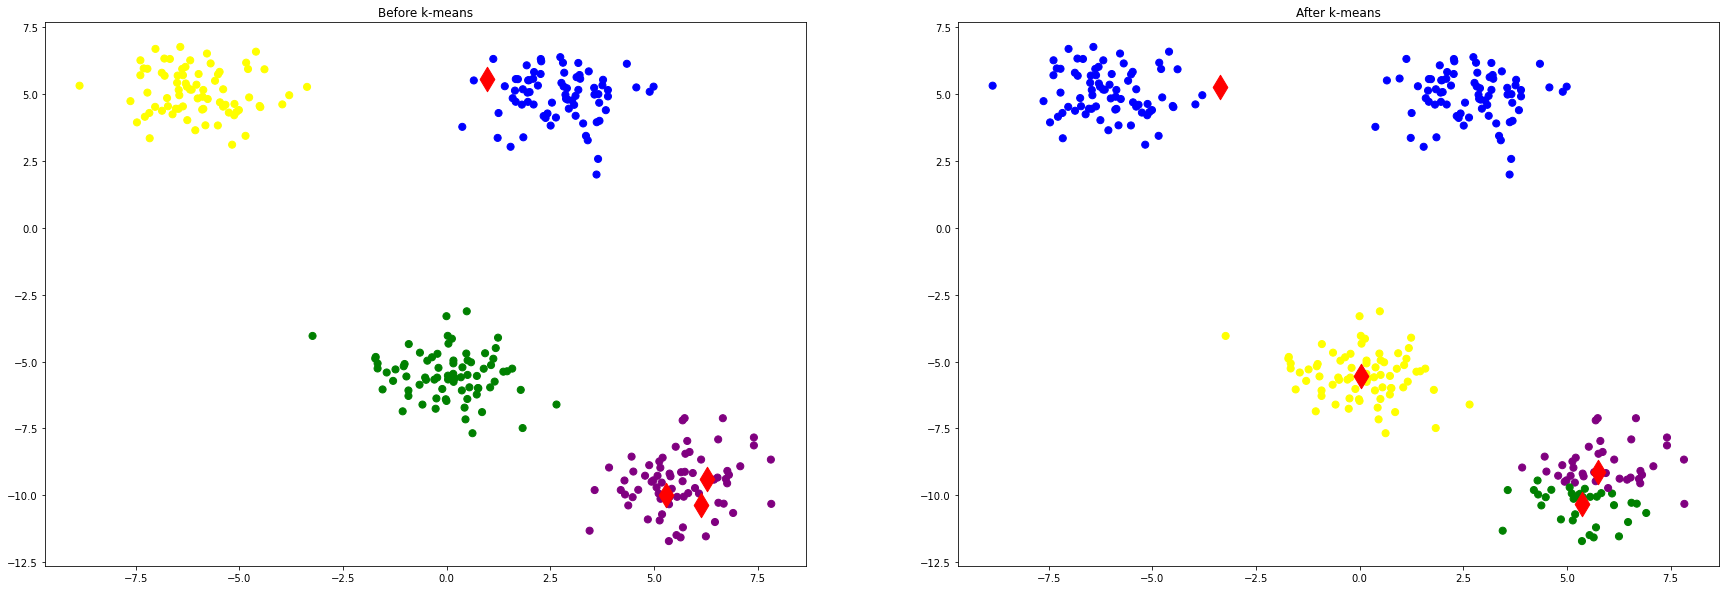

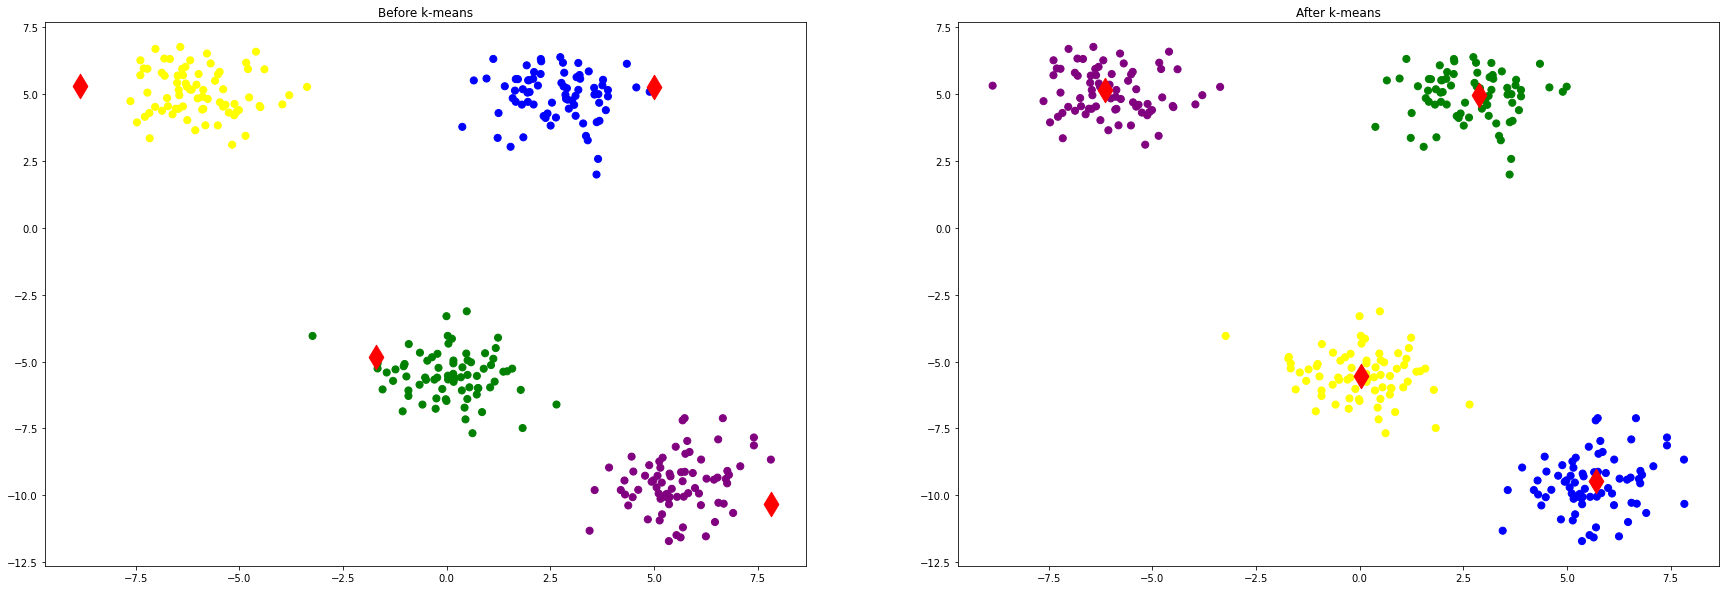

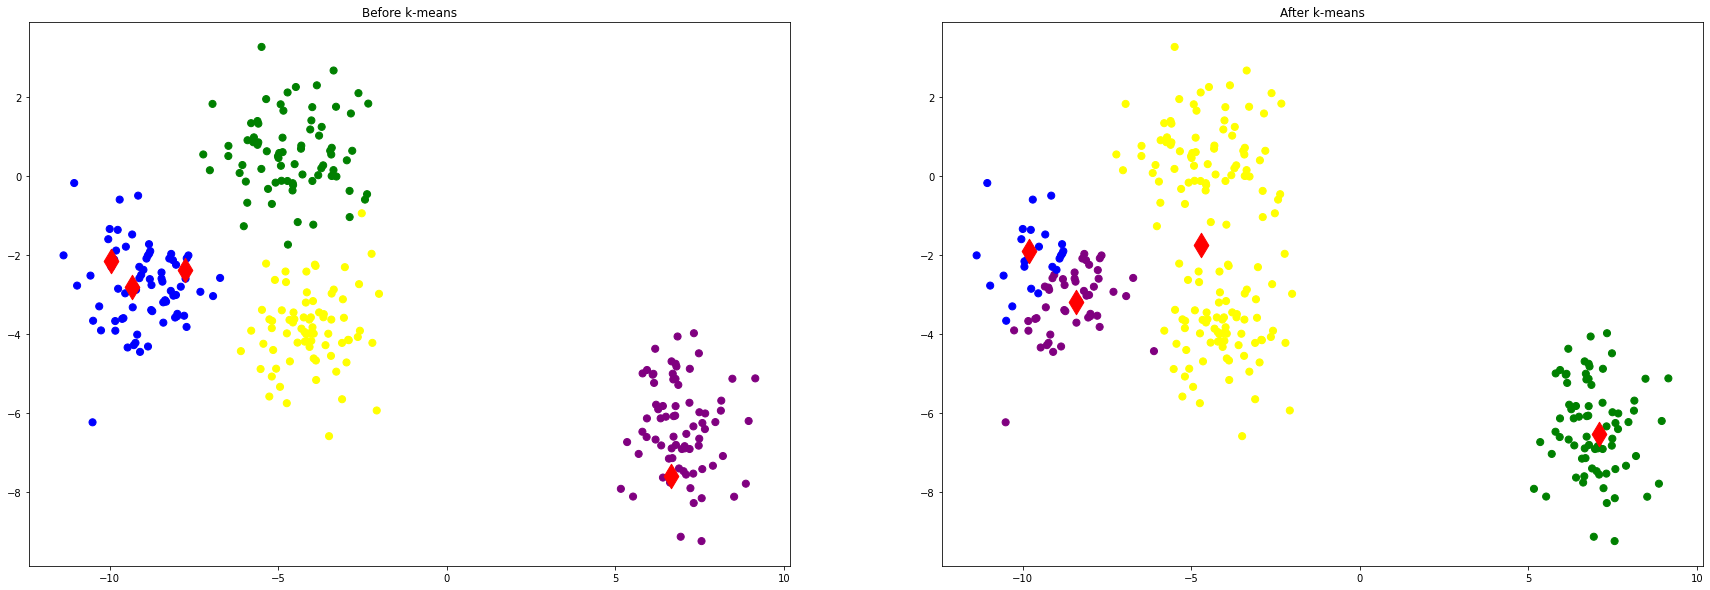

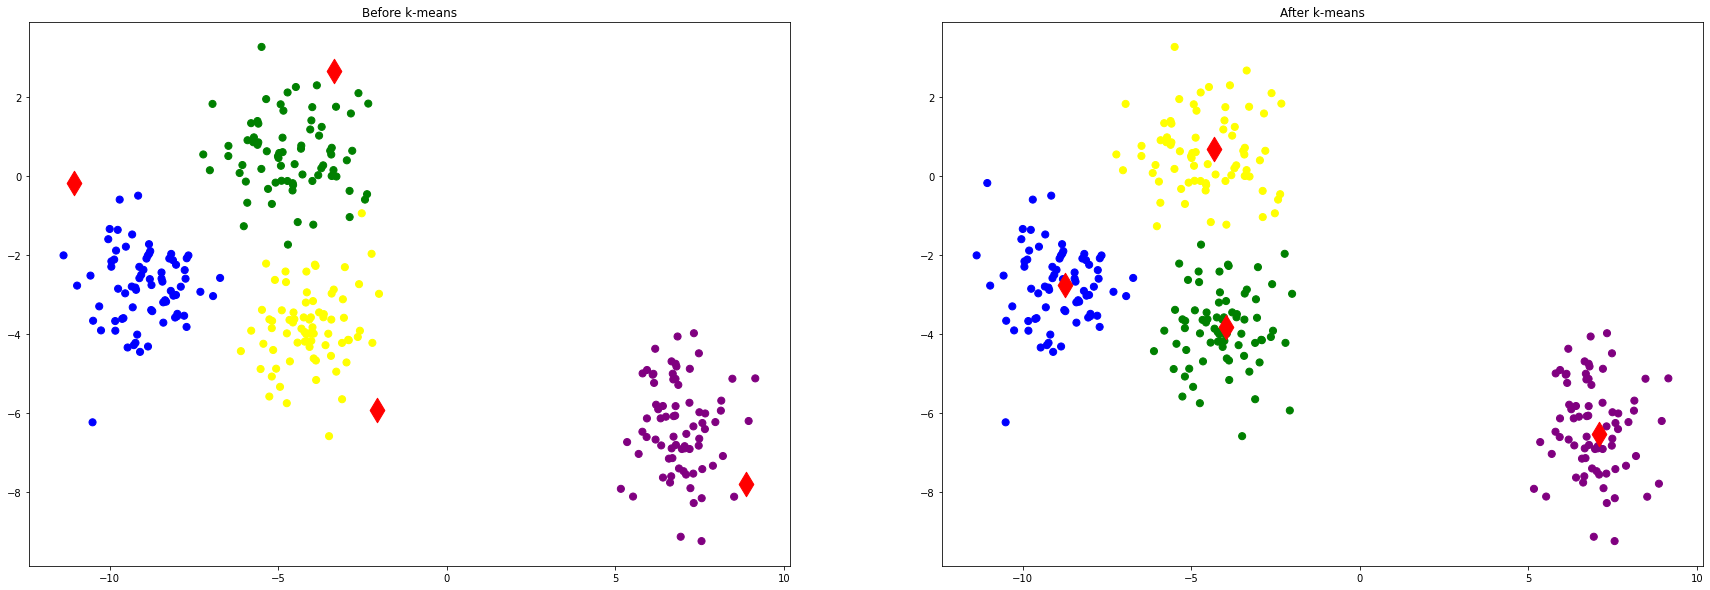

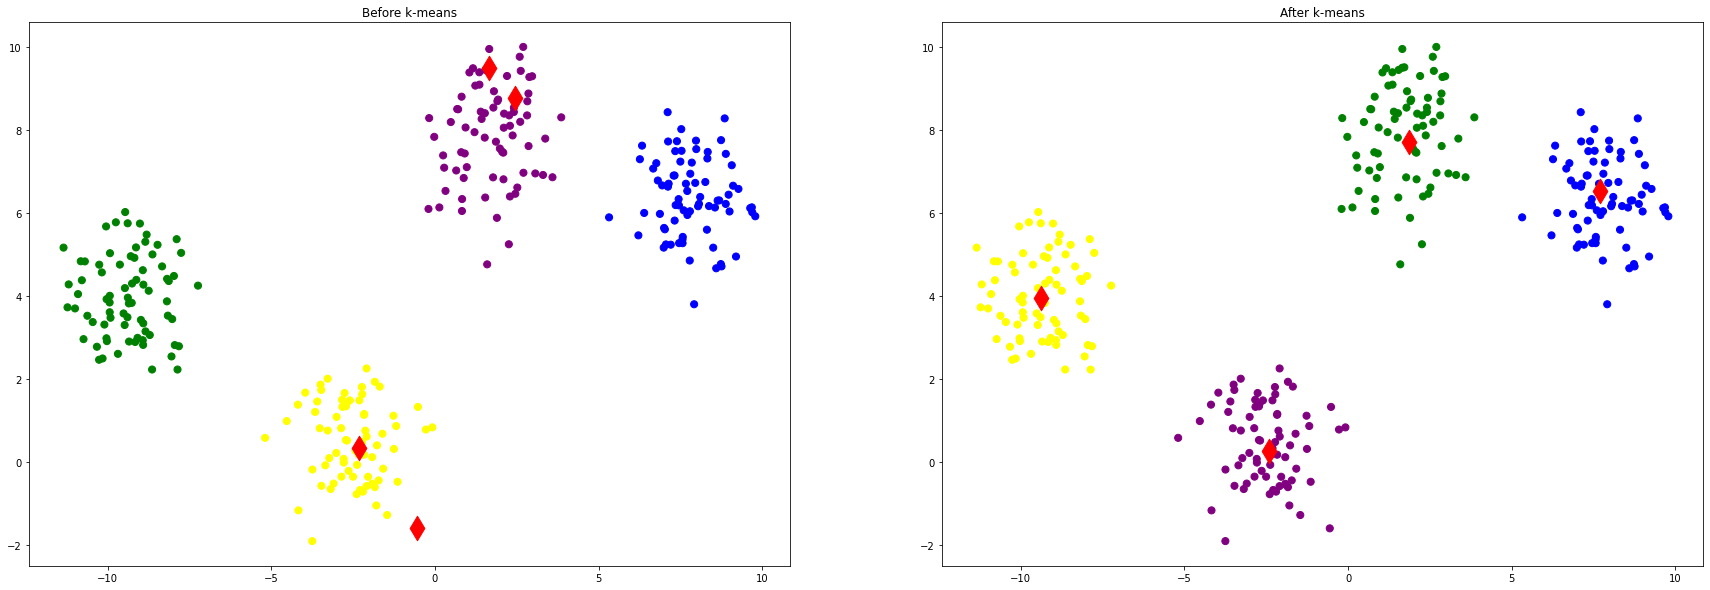

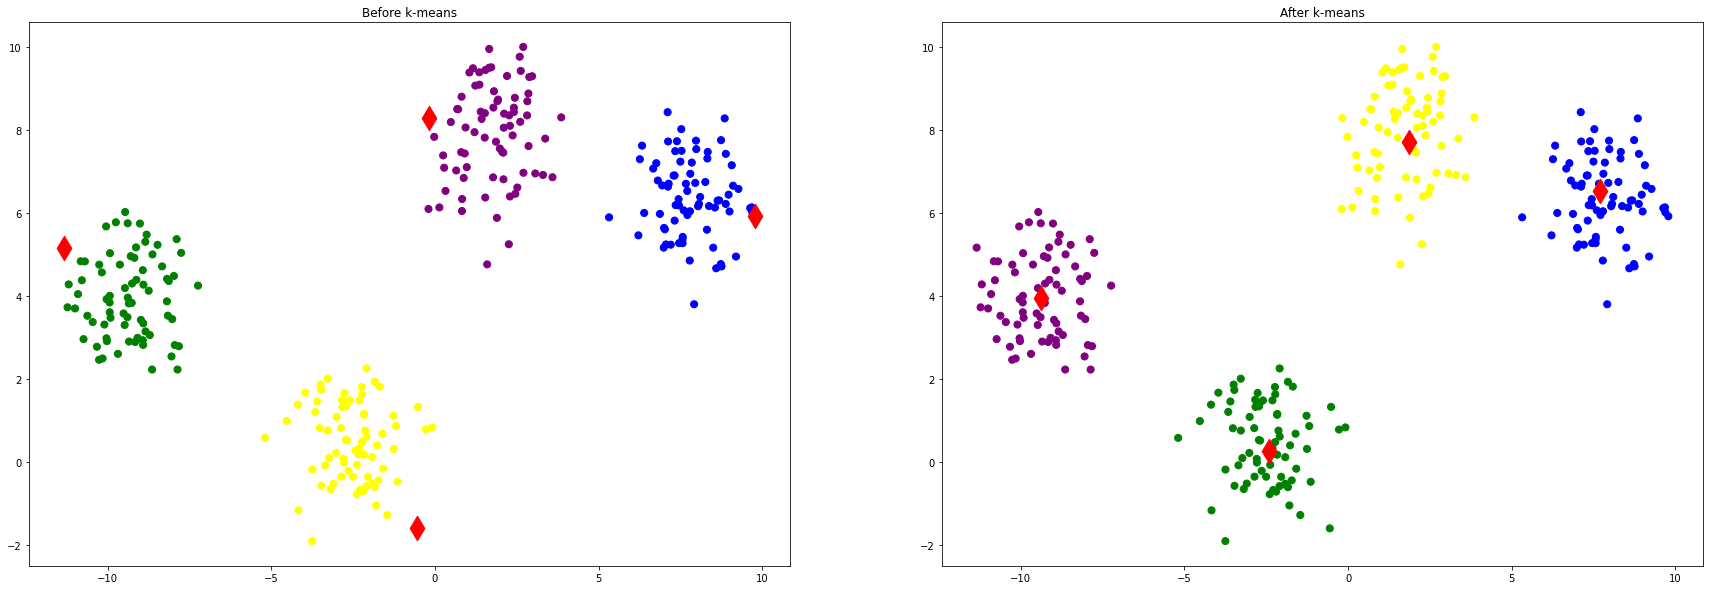

In [6]:
from sklearn.datasets import make_blobs
for i in range(5):
    X, y_old = make_blobs(n_samples = 300, n_features = 2, centers = 4, random_state = i * 5)
    centers_old = Random_center(X, 4)
    y_new, centers_new = k_means(X, np.array(centers_old))
    show_plot(X, y_old, y_new, centers_old, centers_new)
    
    centers_old = Improve_center(X, 4)
    y_new, centers_new = k_means(X, np.array(centers_old))
    show_plot(X, y_old, y_new, centers_old, centers_new)

# 1. Исследовать зависимость от выбора стратегии начальной инициализации 

Как видно из графиков выше, в зависимости от различных иницализаций мы получили два способа кластеризации, то есть можно заметить,
что метод чувствителен к начальным условиям, что является его недостатком. 
Инициализация методом поиска максимальных расстояний дает результат лучше, чем рандомная инициализация центров, то есть начальная 
инициализация специальным методом предпочтительнее для получения верной кластеризации.

# 2. Исследовать для каких задач подходит/не подходит

Задача кластеризации состоит в том, чтобы получить механизм, позволяющий автоматически разделять объекты на классы, используя сходства/различия тех или иных характеристик данных объектов. При построении кластеров используется концепция того, что характеристики объектов
одного кластера должны быть очень схожими и при этом сильно различаться с характеристиками объектов других кластеров (понятие "сходства" и "различие" зависит от конкретной задачи). 
Кластеризация применяется для того, чтобы произвести сжатие данных, то есть уменьшить объем информации за счет того, что объекты одного кластера не особо различаются и их можно рассматривать, как один объект. Помимо схожести, кластеризация позволяет обнаружить нетипичные объекты, которые нельзя отнести ни к одному из кластеров (этот результат также может быть полезен в зависимости от задачи).
Алгоритм K-means работает таким образом, что всякий раз, когда две разные точки данных находятся на значительном расстоянии друг от друга, то они помещается в два разных кластера после разделения. Данный механизм будет хорошо работать с сферическими кластерами одного размера, в то время как, например, с удлиненным набором данных k-means может отработать некорректно, механизм может разбить один удлиненный кластер на несколько, хотя объекты этого набора представляют собой один вытянутый кластер, или, например, представим один большой сферический кластер и рядом с ним несколько маленьких кластеров, в результате работы алгоритма может получиться ситуация, в которой маленькие кластеры будут отнесены к большому, но данная кластеризация не будет являться корректной.

# 3. Предложить и исcледовать стратегию выбора числа кластеров

Text(0.5, 1.0, 'The Elbow Method using Distortion')

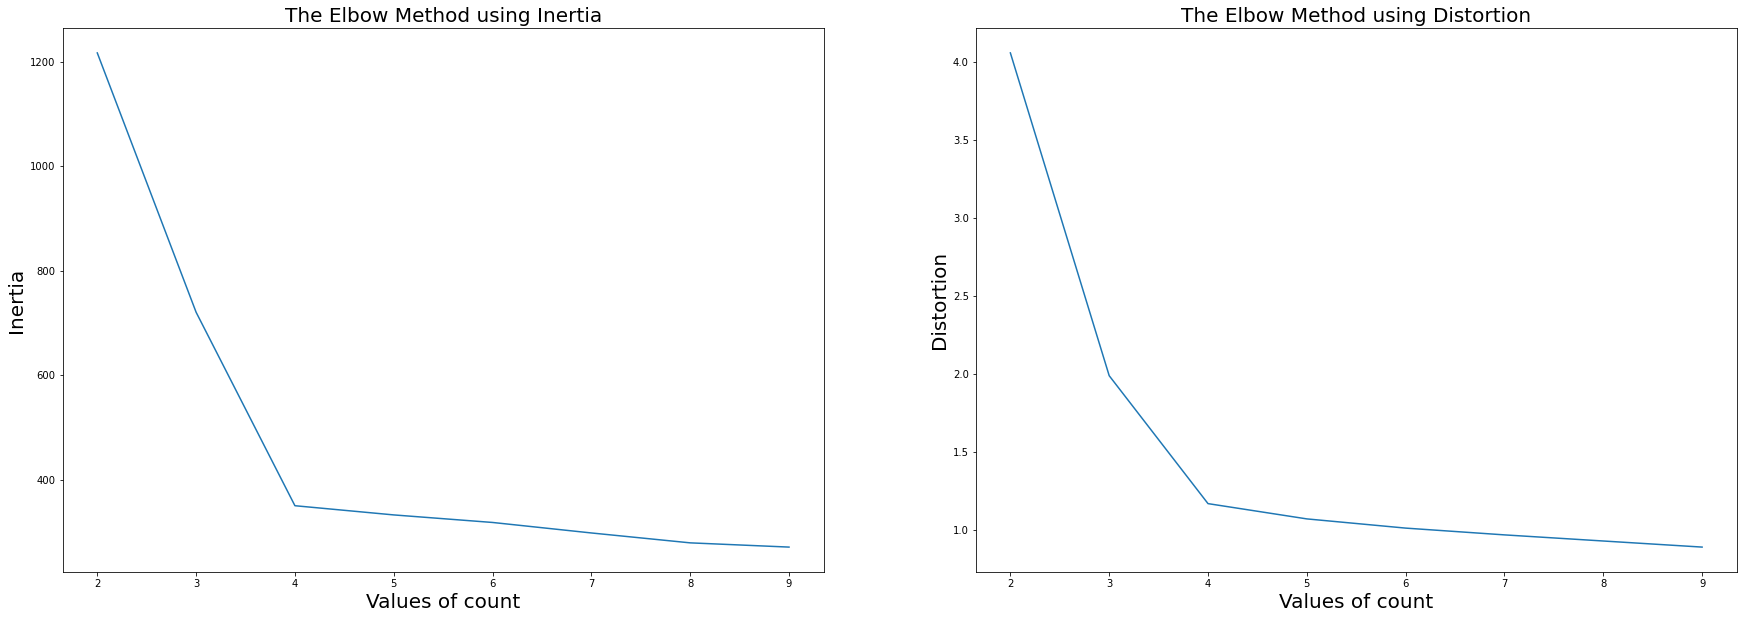

In [28]:
from sklearn.datasets import make_blobs
X, y_old = make_blobs(n_samples = 300, n_features = 2, centers = 4, random_state = 10)
def Inertia(X, y, centers, count):
    size = X.shape[0]
    sum = 0
    for i in range(count):
        number_cluster = y[X.tolist().index(centers[i].tolist())]
        for j in range(size):
            if y[j] == number_cluster:
                sum += norm(X[j] - centers[i])
    return sum
    

def Distortion(X, y, centers, count):
    size = X.shape[0]
    sum = 0
    for i in range(count):
        number_cluster = y[X.tolist().index(centers[i].tolist())]
        claster_count = 0
        sum_now = 0
        for j in range(size):
            if y[j] == number_cluster:
                claster_count += 1
                sum_now += norm(X[j] - centers[i])
        sum += sum_now / claster_count  
    return (sum/count)

counts = []
inertia = []
distortion = []
   
for count in range(2, 10):
    centers_old = Improve_center(X, count)
    y, centers_new = k_means(X, np.array(centers_old))
    counts.append(count)
    inertia.append(Inertia(X, y, centers_new, count))
    distortion.append(Distortion(X, y, centers_new, count))
   
fig = plt.figure(figsize=(30, 10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(counts, inertia)
ax2.plot(counts, distortion)
ax1.set_xlabel('Values of count', fontsize = 20)
ax2.set_xlabel('Values of count', fontsize = 20)
ax1.set_ylabel('Inertia', fontsize = 20)
ax2.set_ylabel('Distortion', fontsize = 20)
ax1.set_title('The Elbow Method using Inertia', fontsize = 20)
ax2.set_title('The Elbow Method using Distortion', fontsize = 20)

# 4.Исследовать зависимость от объема данных

Text(0.5, 1.0, 'Dependence of operating time on the count of claster')

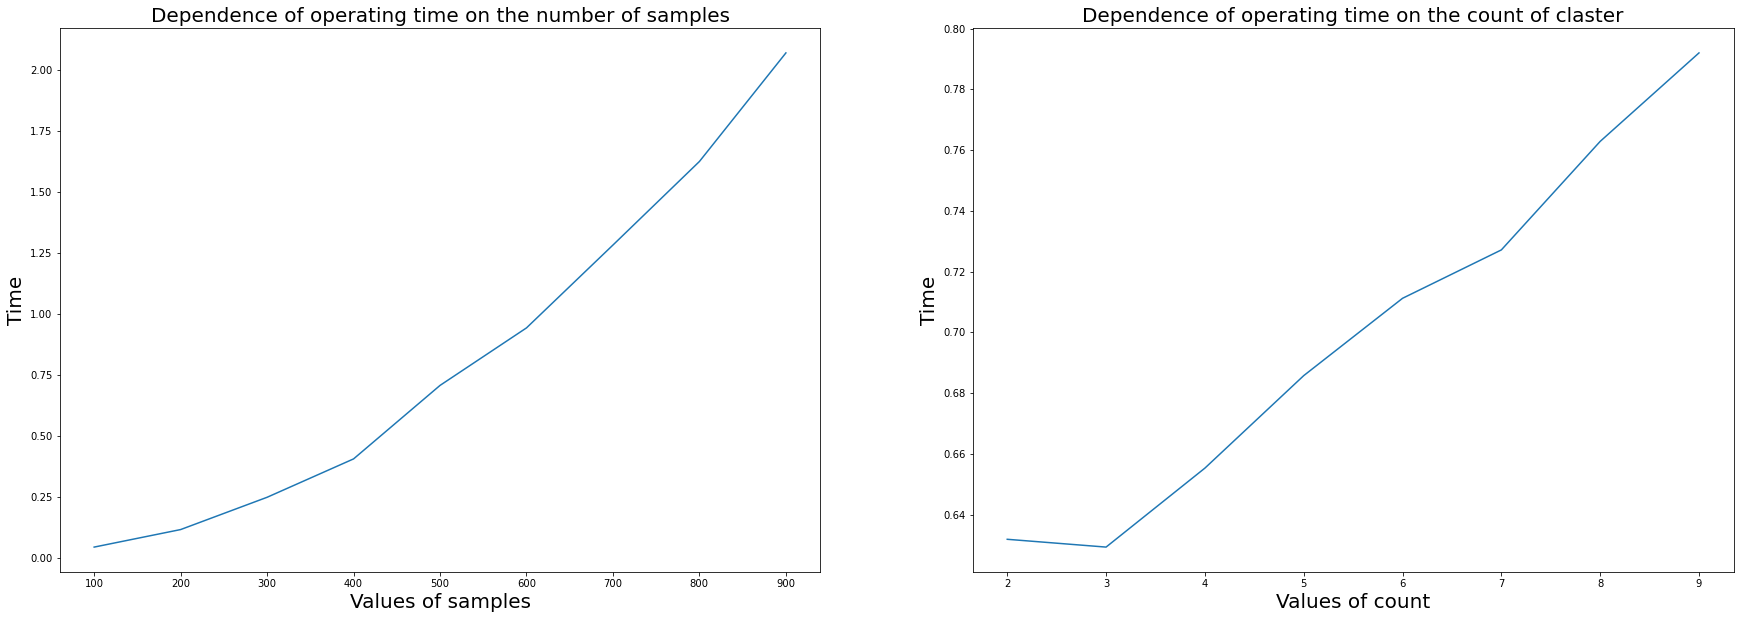

In [80]:
import time

n_samples = []
time_samples = []
count = []
time_count = []

for i in range(1, 10):
    X, y_old = make_blobs(n_samples = 100 * i, n_features = 2, centers = 4, random_state = 10)
    n_samples.append(100 * i)
    start_time = time.time()
    centers_old = Improve_center(X, 4)
    y_new, centers_new = k_means(X, np.array(centers_old))
    time_samples.append(time.time() - start_time)

X, y_old = make_blobs(n_samples = 500, n_features = 2, centers = 4, random_state = 10)
for i in range(2, 10):
    count.append(i)
    start_time = time.time()
    centers_old = Improve_center(X, i)
    y_new, centers_new = k_means(X, np.array(centers_old))
    time_count.append(time.time() - start_time)

fig = plt.figure(figsize=(30, 10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(n_samples, time_samples)
ax2.plot(count, time_count)
ax1.set_xlabel('Values of samples', fontsize = 20)
ax2.set_xlabel('Values of count', fontsize = 20)
ax1.set_ylabel('Time', fontsize = 20)
ax2.set_ylabel('Time', fontsize = 20)
ax1.set_title('Dependence of operating time on the number of samples', fontsize = 20)
ax2.set_title('Dependence of operating time on the count of claster', fontsize = 20)

# 5. Предложить эвристику для визуализации матрицы попарных расстояний

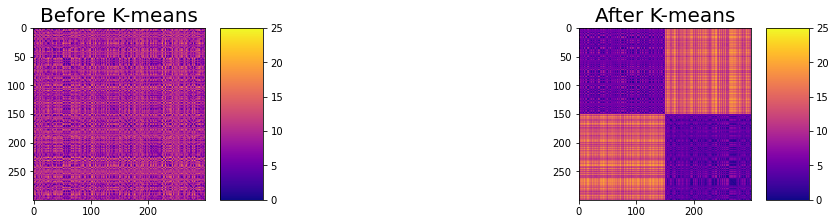

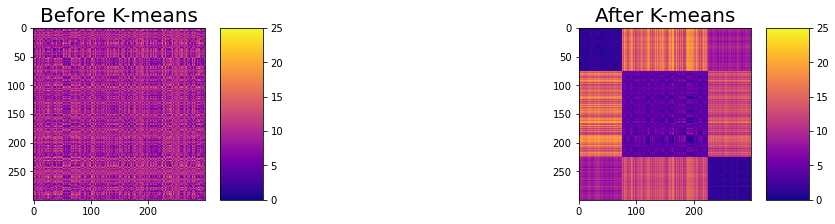

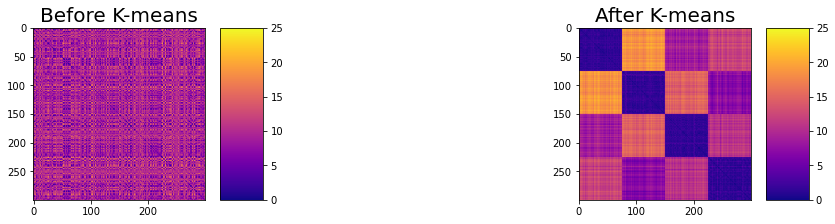

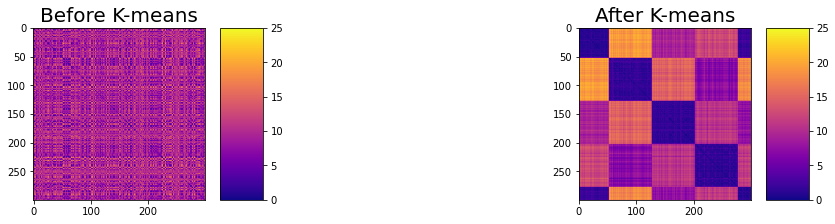

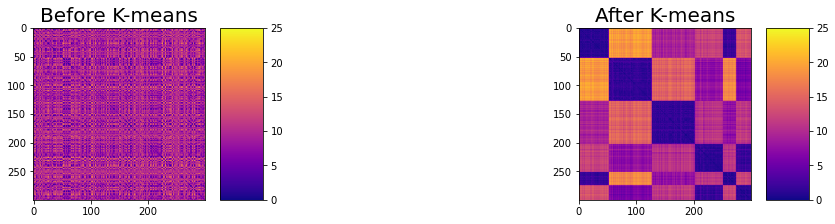

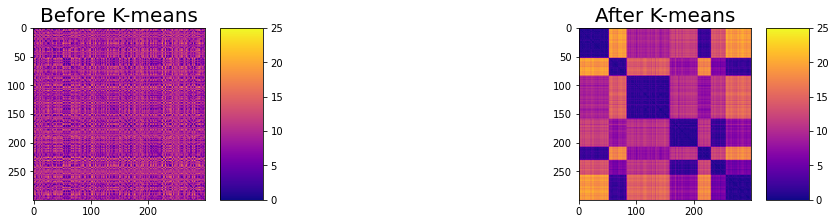

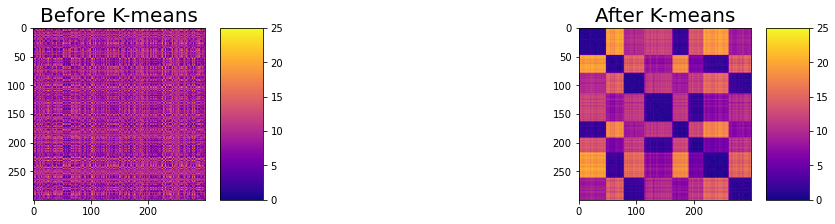

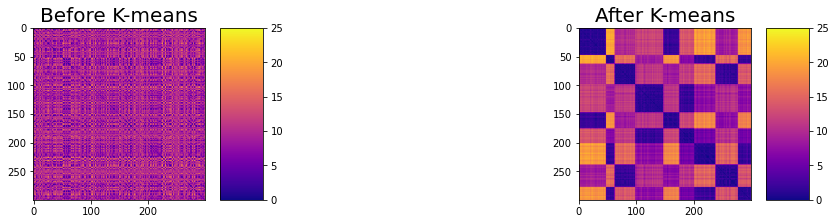

In [73]:
from scipy.spatial import distance_matrix
X, y_old = make_blobs(n_samples = 300, n_features = 2, centers = 4, random_state = 10)

for i in range(2,10):
    fig, axs = plt.subplots(1, 2, figsize=(15,3), constrained_layout=True)
    p1 = axs[0].imshow(distance_matrix(X, X), cmap='plasma', vmin=0, vmax=25)
    fig.colorbar(p1, ax=axs[0])
    centers_old = Improve_center(X, i)
    y_new, centers_new = k_means(np.array(X), np.array(centers_old))
    from operator import itemgetter
    X_sorted = [a for a, b in sorted(zip(X, y_new), key = itemgetter(1))]
    p2 = axs[1].imshow(distance_matrix(X_sorted, X_sorted), cmap='plasma', vmin=0, vmax=25)
    fig.colorbar(p1, ax=axs[1])
    axs[0].set_title('Before K-means', fontsize = 20)
    axs[1].set_title('After K-means', fontsize = 20)

Первая матрица попарных расстояний демонстрирует результат до работы алгоритма k-means, видно, что в таком виде сложно анализировать 
объекты и находить связи между ними, вторая - после работы алгоритма и сортировки первоначальной матрицы в зависимости от кластера.
В отличии от первой картинки, на которой отсутствует структурированность данных, на второй картинке явно видны объекты, принадлежащие 
одному кластеру. 
На основе визуализации матрицы попарных расстояний можно судить о том, насколько хорошо отработал наш алгоритм. Например, для сформированных данных оптимальным количеством кластеров является число 4, построим матрицы попарных расстояний для различных количеств кластеров в диапазоне от 2 до 10, из графиков видно, что наилучшие результаты дали count = 4 и 5.